In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from random import sample
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

* You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

In [2]:
df=pd.read_csv(r'C:\Users\User\Desktop\DATA SCIENCE\Kaggle Projects\Mall Customer Analysis - Clustering\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#Droping the CustomerId column
df.drop(['CustomerID'],axis=1,inplace=True)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [6]:
df.shape

(200, 4)

## Visualzation of the dataset 

### Age 

In [15]:
df['Age'].value_counts()

32    11
35     9
31     8
19     8
30     7
49     7
40     6
38     6
36     6
47     6
23     6
27     6
20     5
48     5
21     5
34     5
50     5
29     5
28     4
24     4
54     4
67     4
59     4
18     4
68     3
60     3
46     3
43     3
45     3
22     3
25     3
39     3
37     3
33     3
58     2
66     2
65     2
63     2
26     2
57     2
44     2
53     2
52     2
51     2
41     2
42     2
70     2
56     1
55     1
64     1
69     1
Name: Age, dtype: int64

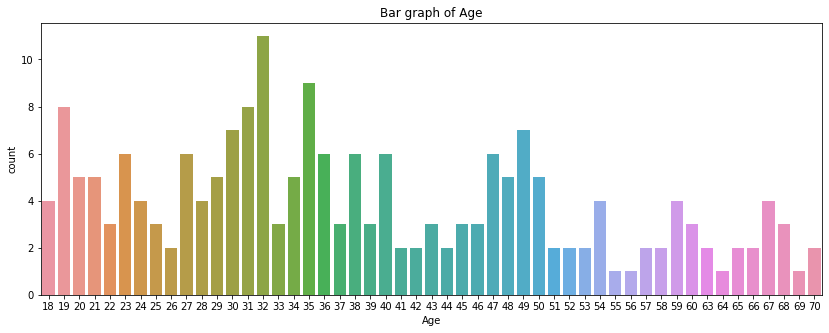

In [23]:
plt.figure(figsize=(14,5))
sns.countplot(df.Age)
plt.title('Bar graph of Age')
plt.show()

### Gender 

In [14]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

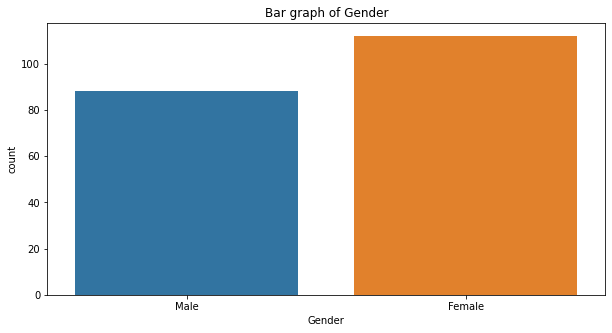

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(df.Gender)
plt.title('Bar graph of Gender')
plt.show()

###  Annual Income (k$)

In [20]:
df['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

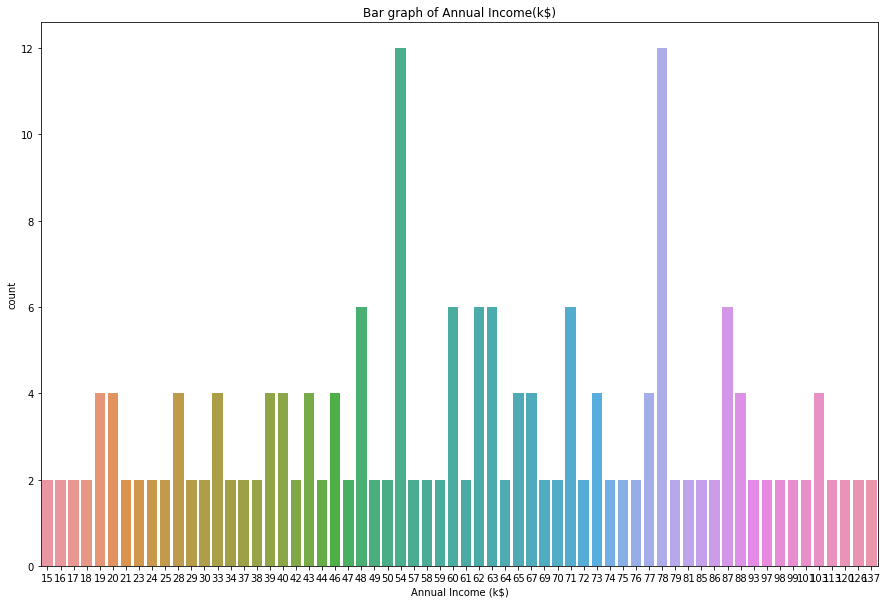

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(df['Annual Income (k$)'])
plt.title('Bar graph of Annual Income(k$)')
plt.show()

###  Spending Score (1-100)

In [34]:
df['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
75    5
     ..
63    1
34    1
44    1
45    1
99    1
Name: Spending Score (1-100), Length: 84, dtype: int64

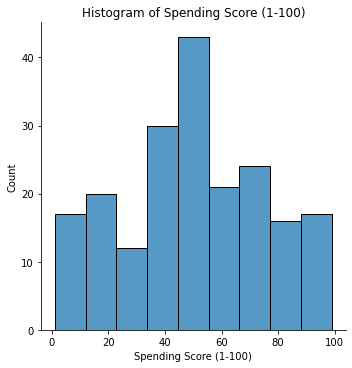

In [40]:
sns.displot(df['Spending Score (1-100)'])
plt.title('Histogram of Spending Score (1-100)')
plt.show()

In [41]:
#Making the column Age as index 
df=df.set_index('Age')
df.head()

,Gender,Annual Income (k$),Spending Score (1-100)
Age,,,
19,Male,15,39
21,Male,15,81
20,Female,16,6
23,Female,16,77
31,Female,17,40


In [45]:
#Assigning male & female as 0 & 1
df.Gender.replace(to_replace=['Male','Female'],value=[0,1],inplace=True)

In [46]:
df.Gender.value_counts()

1    112
0     88
Name: Gender, dtype: int64

In [47]:
#Creating a sample of 10 rows from the dataset
sample=df.sample(frac=0.20,replace=False,random_state=123)
len(sample)
sample

,Gender,Annual Income (k$),Spending Score (1-100)
Age,,,
49,1,42,52
40,0,71,95
30,1,34,73
34,0,78,90
35,1,23,98
49,0,62,56
35,0,93,90
59,0,43,60
19,0,81,5


## Distance matrix 

In [48]:
#Computing Distance Matrix
dm=pd.DataFrame(distance_matrix(sample.values,sample.values),index=sample.index,columns=sample.index)

In [49]:
round(dm,2)

Age,49,40,30,34,35,49,35,59,19,34,...,49,40,29,50,48,31,41,35,24,57
Age,,,,,,,,,,,,,,,,,,,,,
49,0.00,51.87,22.47,52.35,49.77,20.42,63.61,8.12,61.08,62.43,...,15.62,21.63,66.57,25.50,13.45,35.51,58.46,37.74,18.03,57.43
40,51.87,0.00,43.06,8.60,48.10,40.02,22.56,44.82,90.55,94.26,...,55.67,56.10,27.91,38.22,51.87,24.04,62.62,23.22,44.38,90.09
30,22.47,43.06,0.00,47.18,27.31,32.77,61.41,15.84,82.67,84.39,...,36.89,42.01,65.73,36.67,33.62,38.05,73.36,40.01,33.44,79.40
34,52.35,8.60,47.18,0.00,55.59,37.58,15.00,46.10,85.05,89.00,...,53.67,53.15,20.12,34.80,50.12,19.95,55.16,18.47,42.05,85.06
35,49.77,48.10,27.31,55.59,0.00,57.32,70.46,42.95,109.61,111.51,...,64.01,68.80,75.66,60.14,60.55,55.95,96.21,57.25,59.04,106.55
49,20.42,40.02,32.77,37.58,57.32,0.00,46.01,19.42,54.42,57.28,...,16.16,16.16,48.18,5.20,12.81,18.06,40.73,20.02,4.47,52.64
35,63.61,22.56,61.41,15.00,70.46,46.01,0.00,58.31,85.84,90.26,...,61.85,59.92,5.48,42.02,58.80,28.34,51.36,26.19,50.33,86.89
59,8.12,44.82,15.84,46.10,42.95,19.42,58.31,0.00,66.85,68.60,...,21.12,26.27,61.73,24.21,17.80,31.03,59.82,33.26,18.79,63.64
19,61.08,90.55,82.67,85.05,109.61,54.42,85.84,66.85,0.00,5.00,...,45.81,40.83,84.73,53.86,49.09,66.62,38.48,67.37,51.48,6.08


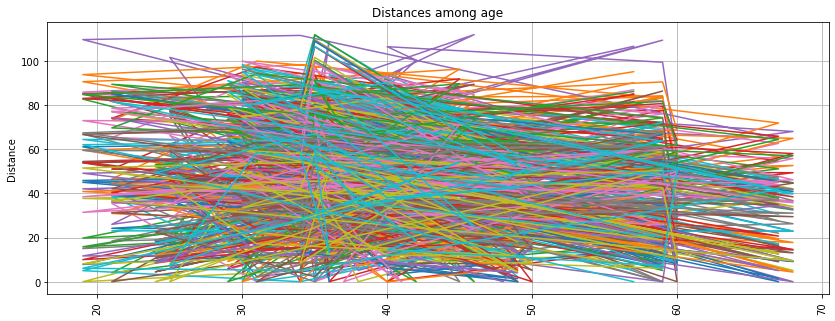

In [51]:
#Visualizing the matrix
plt.figure(figsize=(14,5))
plt.plot(dm)
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(rotation=90)
plt.title('Distances among age')
plt.show()

In [52]:
#Scale the data
df_scaled=StandardScaler().fit_transform(df)
df_scaled

array([[-1.12815215, -1.73899919, -0.43480148],
       [-1.12815215, -1.73899919,  1.19570407],
       [ 0.88640526, -1.70082976, -1.71591298],
       [ 0.88640526, -1.70082976,  1.04041783],
       [ 0.88640526, -1.66266033, -0.39597992],
       [ 0.88640526, -1.66266033,  1.00159627],
       [ 0.88640526, -1.62449091, -1.71591298],
       [ 0.88640526, -1.62449091,  1.70038436],
       [-1.12815215, -1.58632148, -1.83237767],
       [ 0.88640526, -1.58632148,  0.84631002],
       [-1.12815215, -1.58632148, -1.4053405 ],
       [ 0.88640526, -1.58632148,  1.89449216],
       [ 0.88640526, -1.54815205, -1.36651894],
       [ 0.88640526, -1.54815205,  1.04041783],
       [-1.12815215, -1.54815205, -1.44416206],
       [-1.12815215, -1.54815205,  1.11806095],
       [ 0.88640526, -1.50998262, -0.59008772],
       [-1.12815215, -1.50998262,  0.61338066],
       [-1.12815215, -1.43364376, -0.82301709],
       [ 0.88640526, -1.43364376,  1.8556706 ],
       [-1.12815215, -1.39547433, -0.590

## Finding optimum number of clusters 

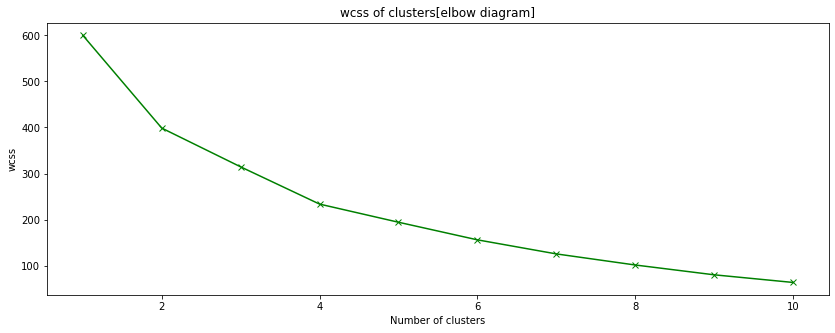

In [58]:
plt.figure(figsize=(14,5))
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='random',random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
wcss #10 values will appear

plt.plot(range(1,11),wcss,'gx-')
plt.title('wcss of clusters[elbow diagram]')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

## Clustering happened 

In [90]:
#Optimum number of clusters = 4
kmeans=KMeans(n_clusters=4)
#Fitting the cluster to the dataset
clusters=kmeans.fit_predict(df_scaled)
#cluster allocation
clusters

array([2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 3, 2, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

## Clustering membership 

In [91]:
Final_Clusters=clusters+1
cluster=list(Final_Clusters)
df['member']=cluster #Addition of the column to dataset
df.head()

,Gender,Annual Income (k$),Spending Score (1-100),member
Age,,,,
19,0,15,39,3
21,0,15,81,3
20,1,16,6,1
23,1,16,77,1
31,1,17,40,1


In [92]:
Final_Clusters

array([3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3,
       1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 4, 3, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

## Overall Silhouette score 

In [93]:
print(f'sil score(n=4):{silhouette_score(df_scaled,cluster)}')

sil score(n=4):0.4108011946319577


## Plotting of clusters 

In [94]:
df.groupby(df['member']).mean()

,Gender,Annual Income (k$),Spending Score (1-100)
member,,,
1,1.000000,45.753247,48.922078
2,0.424242,89.030303,16.212121
3,0.000000,44.627451,49.705882
4,0.538462,86.538462,82.128205


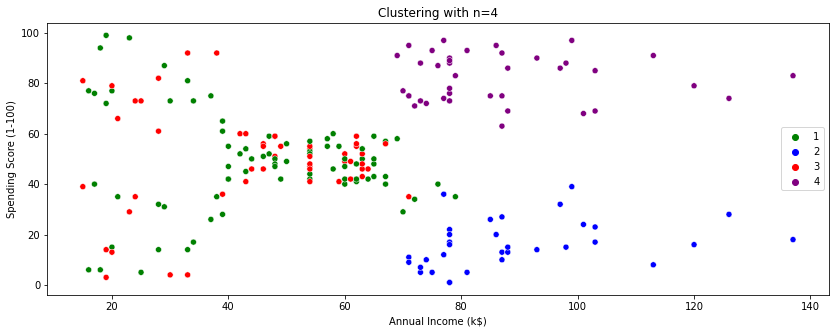

In [96]:
plt.figure(figsize=(14,5))
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=Final_Clusters,palette=['green','blue','red','purple'])
plt.title('Clustering with n=4')
plt.show()